In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
train= pd.read_csv('port(train).csv')
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [3]:
train.dropna(axis=0, subset=['target'], inplace = True)
y=train.target
x=train.drop(['target'],axis=1).select_dtypes(exclude=['object'])

In [4]:
x

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,9,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,13,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,16,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,3,1,10,0,0,0,0,0,1,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,5,1,3,0,0,0,0,0,1,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,1,1,10,0,0,1,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,5,2,3,1,0,0,0,1,0,...,4,1,4,2,0,1,1,1,0,0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33)

In [6]:
#LR
LR = LogisticRegression()
LR.fit(x_train, y_train)


LogisticRegression()

In [7]:
y_pred = LR.predict(x_test)
print("Accuracy of logistic Regression:{:}".format(LR.score(x_test,y_test)))

Accuracy of logistic Regression:0.964463903879442


In [8]:
#performance metrics
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("confusion matrix:\n", CM)


confusion matrix:
 [[189440      0]
 [  6980      0]]


In [9]:
#!pip install imblearn

In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import f1_score

print("precision score", precision_score(y_pred, y_test))
print("Recall score", recall_score(y_pred, y_test))
print("Geometric mean score", geometric_mean_score(y_pred,y_test))
print("F1-score", f1_score(y_pred,y_test))

precision score 0.0
Recall score 0.0
Geometric mean score 0.0
F1-score 0.0


C:\Users\91999\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91999\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


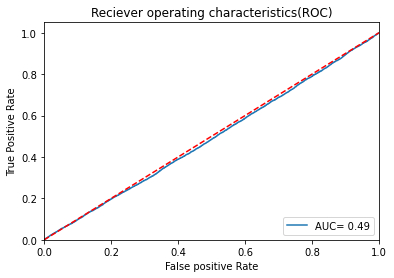

In [12]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC= %0.2f' % auc(fpr,tpr))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristics(ROC)')
plt.legend(loc="lower right")
plt.show()

# Random Undersampling

In [13]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_resample, y_resample = rus.fit_resample(x,y)
len(x_resample)

43388

In [14]:
from collections import Counter
print(sorted(Counter(y_resample).items()))

[(0, 21694), (1, 21694)]


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_resample,y_resample,test_size = 0.33)

In [16]:
#LR
LR1 = LogisticRegression()
LR1.fit(x_train, y_train)


LogisticRegression()

In [17]:
y_pred1 = LR1.predict(x_test)
print("Accuracy of logistic Regression:{:}".format(LR1.score(x_test,y_test)))

Accuracy of logistic Regression:0.4971017529157064


In [18]:
#performance metrics
from sklearn.metrics import confusion_matrix
CM1 = confusion_matrix(y_true=y_test, y_pred=y_pred1)
print("confusion matrix:\n", CM1)

confusion matrix:
 [[7118    0]
 [7201    0]]


In [19]:
#performance
print("precision score", precision_score(y_pred1, y_test))
print("Recall score", recall_score(y_pred1, y_test))
print("Geometric mean score", geometric_mean_score(y_pred1,y_test))
print("F1-score", f1_score(y_pred1,y_test))

precision score 0.0
Recall score 0.0
Geometric mean score 0.0
F1-score 0.0


C:\Users\91999\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91999\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


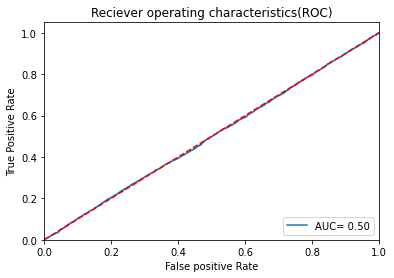

In [20]:
#Auc_Roc on RUS
logit_roc_auc = roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, LR1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC= %0.2f' % auc(fpr,tpr))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristics(ROC)')
plt.legend(loc="lower right")
plt.show()

# Tomek link

In [21]:
from imblearn.under_sampling import TomekLinks
t1 = TomekLinks(sampling_strategy='majority')
x_resampled_t1, y_resampled_t1 = t1.fit_resample(x,y)
len(x_resampled_t1)

583127

In [22]:
print(sorted(Counter(y_resampled_t1).items()))

[(0, 561433), (1, 21694)]


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled_t1, y_resampled_t1 ,test_size = 0.33)

In [28]:
#LR
LR2 = LogisticRegression()
LR2.fit(x_train, y_train)


LogisticRegression()

In [30]:
y_pred2 = LR2.predict(x_test)
print("Accuracy of logistic Regression:{:}".format(LR2.score(x_test,y_test)))

Accuracy of logistic Regression:0.9623035669743079


In [31]:
#performance metrics
from sklearn.metrics import confusion_matrix
CM2 = confusion_matrix(y_true=y_test, y_pred=y_pred2)
print("confusion matrix:\n", CM2)

confusion matrix:
 [[185178      0]
 [  7254      0]]


In [32]:
#performance
print("precision score", precision_score(y_pred2, y_test))
print("Recall score", recall_score(y_pred2, y_test))
print("Geometric mean score", geometric_mean_score(y_pred2,y_test))
print("F1-score", f1_score(y_pred2,y_test))

precision score 0.0
Recall score 0.0
Geometric mean score 0.0
F1-score 0.0


C:\Users\91999\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91999\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


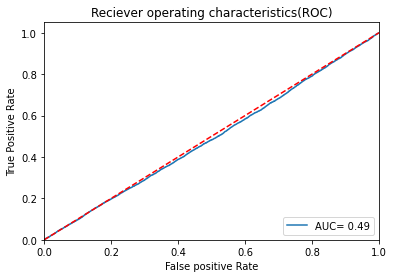

In [33]:
#Auc_Roc on RUS
logit_roc_auc = roc_auc_score(y_test, y_pred2)
fpr, tpr, thresholds = roc_curve(y_test, LR2.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC= %0.2f' % auc(fpr,tpr))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristics(ROC)')
plt.legend(loc="lower right")
plt.show()

# Edited Nearest Neighbours(ENN)

In [36]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
x_resampled_enn, y_resampled_enn = enn.fit_resample(x,y)
print(sorted(Counter(y_resampled_enn).items()))

[(0, 514202), (1, 21694)]


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled_enn, y_resampled_enn ,test_size = 0.33)

In [38]:
#LR
LR3 = LogisticRegression()
LR3.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_pred3 = LR3.predict(x_test)
print("Accuracy of logistic Regression:{:}".format(LR3.score(x_test,y_test)))

Accuracy of logistic Regression:0.9591622089275414


In [40]:
#performance metrics
from sklearn.metrics import confusion_matrix
CM3 = confusion_matrix(y_true=y_test, y_pred=y_pred3)
print("confusion matrix:\n", CM3)

confusion matrix:
 [[169624      0]
 [  7222      0]]


In [41]:
#performance
print("precision score", precision_score(y_pred3, y_test))
print("Recall score", recall_score(y_pred3, y_test))
print("Geometric mean score", geometric_mean_score(y_pred3,y_test))
print("F1-score", f1_score(y_pred3,y_test))

precision score 0.0
Recall score 0.0
Geometric mean score 0.0
F1-score 0.0


C:\Users\91999\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91999\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


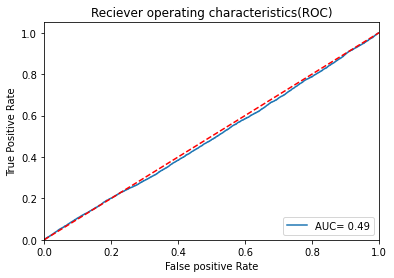

In [42]:
#Auc_Roc on RUS
logit_roc_auc = roc_auc_score(y_test, y_pred3)
fpr, tpr, thresholds = roc_curve(y_test, LR3.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC= %0.2f' % auc(fpr,tpr))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristics(ROC)')
plt.legend(loc="lower right")
plt.show()

# Random oversampling

In [44]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resample_ros, y_resampled_ros = ros.fit_resample(x,y)
len(x_resample_ros)
print(sorted(Counter(y_resampled_ros).items()))

[(0, 573518), (1, 573518)]


# Synthetic Minority Oversampling Technique (SMOTE)

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,k_neighbors=5)
x_resample_sm, y_resampled_sm = sm.fit_resample(x,y)
print(sorted(Counter(y_resampled_sm).items()))

[(0, 573518), (1, 573518)]


# Adaptive Synthetic Sampling (ADASYN)

In [49]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42,n_neighbors=5)
x_resample_ada, y_resampled_ada = ada.fit_resample(x,y)
print(sorted(Counter(y_resampled_ada).items()))

[(0, 573518), (1, 566223)]


# Hybrid1

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
x_resampled_smen, y_resampled_smen = smote_enn.fit_resample(x, y)
print(sorted(Counter(y_resampled_smen).items()))

# Hybrid2

In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
x_resampled_smtm, y_resampled_smtm = smote_tomek.fit_resample(x, y)
print(sorted(Counter(y_resampled_smtm).items()))